In [21]:
# Pandas for managing datasets
import pandas as pd

# Re for cleaning up data headers
import re

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
sns.set()

In [34]:
# Read dataset
df = pd.read_csv('data/1.clustering/dog.005.js-matrix.csv')
df2 = pd.read_csv('data/1.clustering/dog.05.js-matrix.csv')
df3 = pd.read_csv('data/1.clustering/dog.5.js-matrix.csv')
df4 = pd.read_csv('data/1.clustering/dog.5.0.js-matrix.csv')
df.head()

,HPLC/SAMN06172413.sketch,HPLC/SAMN06172486.sketch,Baseline/SAMN06172509.sketch,Baseline/SAMN06172446.sketch,Baseline/SAMN06172450.sketch,Baseline/SAMN06172511.sketch,HPLC/SAMN06172514.sketch,Baseline/SAMN06172440.sketch,Baseline/SAMN06172497.sketch,Baseline/SAMN06172519.sketch,...,LPHC/SAMN06172506.sketch,Baseline/SAMN06172406.sketch,HPLC/SAMN06172443.sketch,LPHC/SAMN06172429.sketch,LPHC/SAMN06172462.sketch,Baseline/SAMN06172467.sketch,Baseline/SAMN06172501.sketch,Baseline/SAMN06172513.sketch,HPLC/SAMN06172409.sketch,Baseline/SAMN06172471.sketch
0,100.00,38.28,36.13,39.84,36.72,39.65,34.77,38.48,40.43,34.77,...,32.62,34.38,31.25,36.13,31.84,36.91,33.20,37.70,34.38,41.02
1,38.28,100.00,38.67,37.11,39.45,39.65,35.16,43.36,41.99,38.28,...,36.91,34.96,35.35,37.70,38.67,37.89,38.67,40.04,38.67,38.09
2,36.13,38.67,100.00,42.19,41.60,42.19,37.70,41.41,40.43,38.09,...,36.33,40.04,33.98,36.52,37.11,37.30,41.99,41.60,38.87,37.89
3,39.84,37.11,42.19,100.00,41.41,42.19,41.21,44.92,41.41,39.84,...,39.26,38.87,35.94,38.67,40.82,43.95,41.60,45.90,38.67,38.87
4,36.72,39.45,41.60,41.41,100.00,43.55,39.65,41.21,43.75,39.65,...,39.26,40.43,39.84,38.48,42.77,40.04,42.77,40.43,36.13,45.90


In [35]:
# Rename columns to just diet
df = df.rename(columns=lambda x: re.sub('/.*','',x))
df2 = df.rename(columns=lambda x: re.sub('/.*','',x))
df3 = df.rename(columns=lambda x: re.sub('/.*','',x))
df4 = df.rename(columns=lambda x: re.sub('/.*','',x))
df.head()

,HPLC,HPLC,Baseline,Baseline,Baseline,Baseline,HPLC,Baseline,Baseline,Baseline,...,LPHC,Baseline,HPLC,LPHC,LPHC,Baseline,Baseline,Baseline,HPLC,Baseline
0,100.00,38.28,36.13,39.84,36.72,39.65,34.77,38.48,40.43,34.77,...,32.62,34.38,31.25,36.13,31.84,36.91,33.20,37.70,34.38,41.02
1,38.28,100.00,38.67,37.11,39.45,39.65,35.16,43.36,41.99,38.28,...,36.91,34.96,35.35,37.70,38.67,37.89,38.67,40.04,38.67,38.09
2,36.13,38.67,100.00,42.19,41.60,42.19,37.70,41.41,40.43,38.09,...,36.33,40.04,33.98,36.52,37.11,37.30,41.99,41.60,38.87,37.89
3,39.84,37.11,42.19,100.00,41.41,42.19,41.21,44.92,41.41,39.84,...,39.26,38.87,35.94,38.67,40.82,43.95,41.60,45.90,38.67,38.87
4,36.72,39.45,41.60,41.41,100.00,43.55,39.65,41.21,43.75,39.65,...,39.26,40.43,39.84,38.48,42.77,40.04,42.77,40.43,36.13,45.90


In [36]:
# Check number of samples for each diet
df.columns.value_counts()

Baseline    64
HPLC        33
LPHC        32
dtype: int64

In [37]:
# Get the diet labels
diets = pd.Series(df.columns)

In [38]:
# Create a palette to identify the diets
diets_pal = sns.color_palette("husl", len(diets.unique()))

In [39]:
# Create a lookup table to link palette to diet
lut = dict(zip(diets.unique(), diets_pal))

dict_keys(['HPLC', 'Baseline', 'LPHC'])


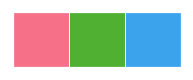

In [40]:
# Convert the palette to vectors that will be drawn on the side of the matrix
colours = diets.map(lut)

# Print the dendrogram key
print(lut.keys())
sns.palplot(diets_pal)

Text(0.5,0.98,'Dog microbiome hulk sketches clustered by Jaccard Similarity')

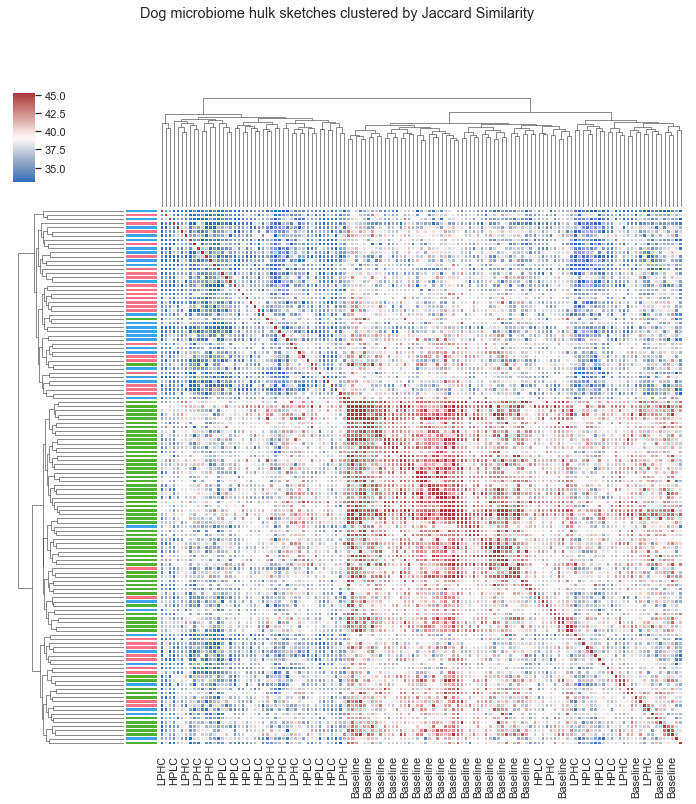

In [41]:
# Plot the clustermaps
g = sns.clustermap(df, cmap="vlag", method='complete',
                   row_colors=colours, row_cluster=True, col_cluster=True, yticklabels=False,
                   robust=True, linewidths=.50, figsize=(12, 12))
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
g.fig.suptitle("Dog microbiome hulk sketches clustered by Jaccard Similarity")

Text(0.5,0.98,'Dog microbiome hulk sketches clustered by Jaccard Similarity')

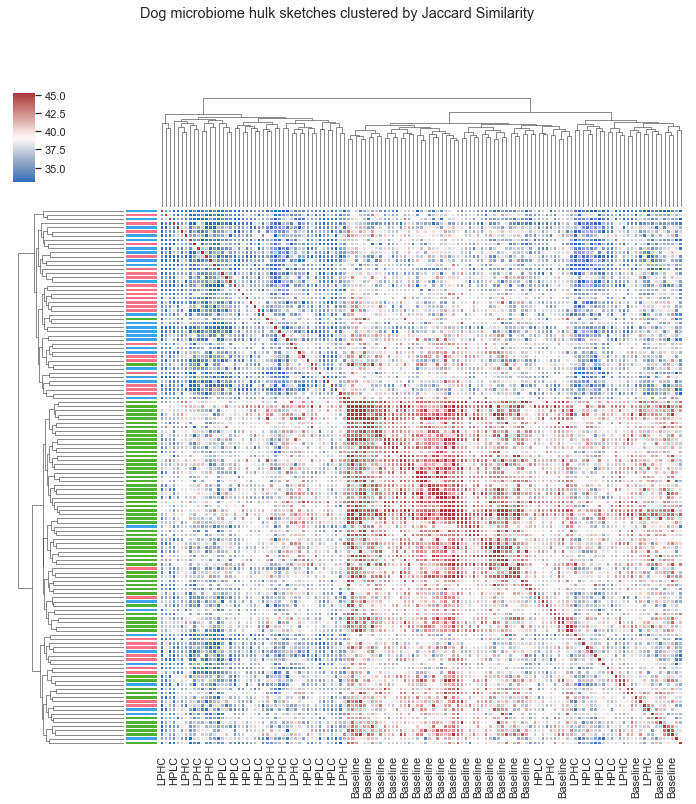

In [42]:
g = sns.clustermap(df2, cmap="vlag", method='complete',
                   row_colors=colours, row_cluster=True, col_cluster=True, yticklabels=False,
                   robust=True, linewidths=.50, figsize=(12, 12))
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
g.fig.suptitle("Dog microbiome hulk sketches clustered by Jaccard Similarity")

Text(0.5,0.98,'Dog microbiome hulk sketches clustered by Jaccard Similarity')

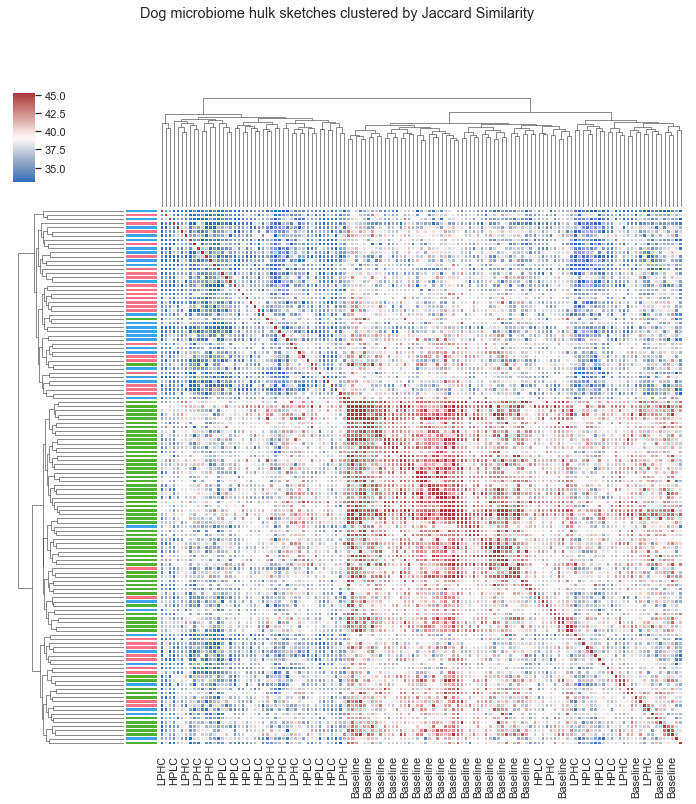

In [43]:
g = sns.clustermap(df3, cmap="vlag", method='complete',
                   row_colors=colours, row_cluster=True, col_cluster=True, yticklabels=False,
                   robust=True, linewidths=.50, figsize=(12, 12))
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
g.fig.suptitle("Dog microbiome hulk sketches clustered by Jaccard Similarity")

Text(0.5,0.98,'Dog microbiome hulk sketches clustered by Jaccard Similarity')

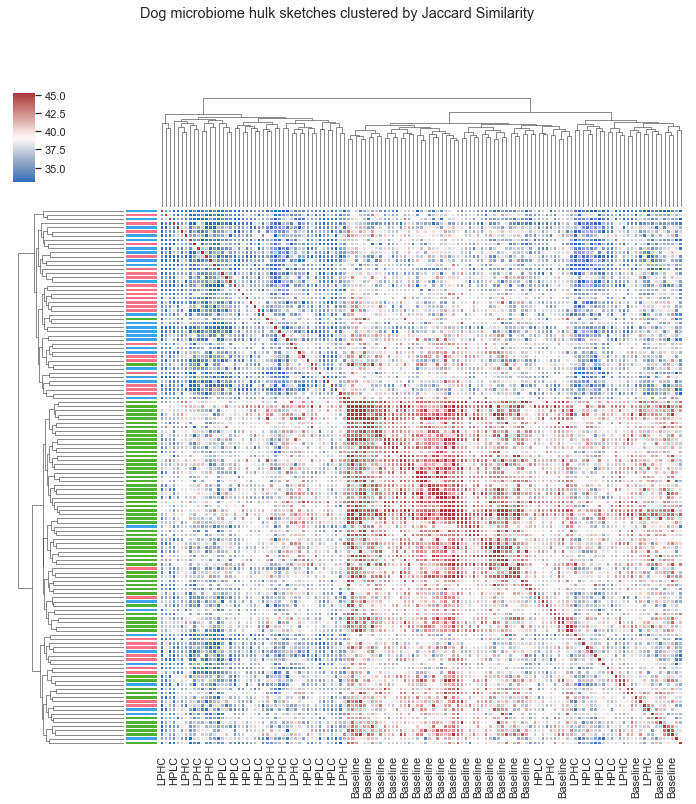

In [44]:
g = sns.clustermap(df4, cmap="vlag", method='complete',
                   row_colors=colours, row_cluster=True, col_cluster=True, yticklabels=False,
                   robust=True, linewidths=.50, figsize=(12, 12))
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
g.fig.suptitle("Dog microbiome hulk sketches clustered by Jaccard Similarity")